In [1]:
import numpy as np
import os 
import arviz as az
import pandas as pd
import math
import xarray as xr
import matplotlib.pyplot as plt
os.chdir("..")
import model_data as md
import waic as wc
os.getcwd()

'C:\\Users\\brett\\sparklyRGT\\Pystan'

In [2]:
os.chdir("WAIC")

In [3]:
waic_df = pd.read_excel("waic_values.xlsx")
waic_df = waic_df.rename(columns = {'Unnamed: 0': "subs"})
waic_df = waic_df.set_index('subs')
waic_df

,basic_waic,basic_waic_SE,basicstar_waic,basicstar_waic_SE,pscale_waic,pscale_waic_SE,pscalestar_waic,pscalestar_SE,pindep_waic,pindep_waic_SE,pindepstar_waic,pindepstar_waic_SE
subs,,,,,,,,,,,,
loss,-16517.427212,4.152543,-16698.925599,4.359222,-16425.598279,4.241947,-16681.323139,4.392174,-16277.110943,4.133473,-16346.815732,4.232541
outcome,-15740.442956,1.846242,-15769.165498,2.102947,-15700.376306,1.889044,-15674.544179,2.027254,-15444.843511,1.847544,-15451.835650,1.980440
random,-26118.947991,5.489336,-32087.875008,12.633443,-24523.648346,4.062790,-32547.462994,15.813085,-23141.890611,3.579618,-23200.395180,3.644527
reverse,-31018.595878,6.931944,-31538.704672,7.367145,-29404.221532,5.474285,-32700.574507,7.842773,-26340.631191,3.307347,-26393.935470,3.345210
standard,-37385.103095,4.572181,-37530.138846,4.598955,-37230.533323,4.837552,-38432.181192,5.495276,-33119.792469,3.900934,-33128.725420,3.928093
uncued,-36095.100924,6.178981,-45813.577261,13.576177,-33270.255670,5.136851,-44950.630424,12.760540,-30010.218928,3.969756,-30061.757553,4.027125


In [ ]:
waic_df_

In [ ]:
subs = waic_df["Unnamed: 0"]
subs_list = list(subs)
subs_list
waic_df[["basic_waic", "basicstar_waic"]]
waic_df.iloc[[0]]

In [ ]:
loss_row = waic_df.iloc[[0]]
outcome_row = waic_df.iloc[[1]]
random_row = waic_df.iloc[[2]]
reverse_row = waic_df.iloc[[3]]
standard_row = waic_df.iloc[[4]]
uncued_row = waic_df.iloc[[5]]

In [ ]:
labels = subs_list
loss_waics = loss_row[["basic_waic", "basicstar_waic", "pscale_waic", "pscalestar_waic", "pindep_waic", "pindepstar_waic"]]
outcome_waics = outcome_row[["basic_waic", "basicstar_waic", "pscale_waic", "pscalestar_waic", "pindep_waic", "pindepstar_waic"]]
random_waics = random_row[["basic_waic", "basicstar_waic", "pscale_waic", "pscalestar_waic", "pindep_waic", "pindepstar_waic"]]
reverse_waics = reverse_row[["basic_waic", "basicstar_waic", "pscale_waic", "pscalestar_waic", "pindep_waic", "pindepstar_waic"]]
standard_waics = standard_row[["basic_waic", "basicstar_waic", "pscale_waic", "pscalestar_waic", "pindep_waic", "pindepstar_waic"]]
uncued_waics = uncued_row[["basic_waic", "basicstar_waic", "pscale_waic", "pscalestar_waic", "pindep_waic", "pindepstar_waic"]]

loss_values = loss_waics.values[0].tolist()
outcome_values = outcome_waics.values[0].tolist()
random_values = random_waics.values[0].tolist()
reverse_values = reverse_waics.values[0].tolist()
standard_values = standard_waics.values[0].tolist()
uncued_values = uncued_waics.values[0].tolist()

In [ ]:
basic_waics = waic_df["basic_waic"].tolist()
basicstar_waics = waic_df["basicstar_waic"].tolist()
pscale_waics = waic_df["pscale_waic"].tolist()
pscalestar_waics = waic_df["pscalestar_waic"].tolist()
pindep_waics = waic_df["pindep_waic"].tolist()
pindepstar_waics = waic_df["pindepstar_waic"].tolist()

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, basic_waics, width, label='Loss')
rects2 = ax.bar(x + width/2, basicstar_waics, width, label='Outcome')
rects3 = ax.bar(x + 3*width/2, pscale_waics, width, label='Random')
rects4 = ax.bar(x + 5*width/2, pscalestar_waics, width, label='Reverse')
rects5 = ax.bar(x + 7*width/2, pindep_waics, width, label='Standard')
rects6 = ax.bar(x + 9*width/2, pindepstar_waics, width, label='Uncued')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

In [ ]:
df

In [11]:
waic_df_values = waic_df[["basic_waic", "basicstar_waic", "pscale_waic", "pscalestar_waic", "pindep_waic", "pindepstar_waic"]]
waic_df_se = waic_df[["basic_waic_SE", "basicstar_waic_SE", "pscale_waic_SE", "pscalestar_SE", "pindep_waic_SE", "pindepstar_waic_SE"]]
waic_df_values = waic_df_values.transform(func = lambda x : x * -1)
# waic_df_se = waic_df_se.transform(func = lambda x : x * 10000)

waic_df_values


,basic_waic,basicstar_waic,pscale_waic,pscalestar_waic,pindep_waic,pindepstar_waic
subs,,,,,,
loss,16517.427212,16698.925599,16425.598279,16681.323139,16277.110943,16346.815732
outcome,15740.442956,15769.165498,15700.376306,15674.544179,15444.843511,15451.835650
random,26118.947991,32087.875008,24523.648346,32547.462994,23141.890611,23200.395180
reverse,31018.595878,31538.704672,29404.221532,32700.574507,26340.631191,26393.935470
standard,37385.103095,37530.138846,37230.533323,38432.181192,33119.792469,33128.725420
uncued,36095.100924,45813.577261,33270.255670,44950.630424,30010.218928,30061.757553


In [14]:
waic_zero = pd.DataFrame(columns = waic_df_values.columns, index = waic_df_values.index)

for col in waic_df_values.columns:
    waic_zero[col] = waic_df_values[col] - waic_df_values.pindep_waic
    
waic_zero
    

,basic_waic,basicstar_waic,pscale_waic,pscalestar_waic,pindep_waic,pindepstar_waic
subs,,,,,,
loss,240.316269,421.814656,148.487336,404.212196,0.0,69.704789
outcome,295.599445,324.321987,255.532795,229.700668,0.0,6.992139
random,2977.057379,8945.984397,1381.757735,9405.572383,0.0,58.504569
reverse,4677.964687,5198.073481,3063.590341,6359.943316,0.0,53.304279
standard,4265.310626,4410.346377,4110.740854,5312.388723,0.0,8.932950
uncued,6084.881997,15803.358333,3260.036742,14940.411497,0.0,51.538626


In [15]:
cols = ['basicstar_waic','basic_waic','pscalestar_waic','pscale_waic','pindepstar_waic','pindep_waic']

waic_zero = waic_zero[cols]
waic_zero

,basicstar_waic,basic_waic,pscalestar_waic,pscale_waic,pindepstar_waic,pindep_waic
subs,,,,,,
loss,421.814656,240.316269,404.212196,148.487336,69.704789,0.0
outcome,324.321987,295.599445,229.700668,255.532795,6.992139,0.0
random,8945.984397,2977.057379,9405.572383,1381.757735,58.504569,0.0
reverse,5198.073481,4677.964687,6359.943316,3063.590341,53.304279,0.0
standard,4410.346377,4265.310626,5312.388723,4110.740854,8.932950,0.0
uncued,15803.358333,6084.881997,14940.411497,3260.036742,51.538626,0.0


In [16]:
waic_zero = waic_zero.reindex(['uncued','standard','reverse','outcome','random','loss'])
waic_zero

,basicstar_waic,basic_waic,pscalestar_waic,pscale_waic,pindepstar_waic,pindep_waic
subs,,,,,,
uncued,15803.358333,6084.881997,14940.411497,3260.036742,51.538626,0.0
standard,4410.346377,4265.310626,5312.388723,4110.740854,8.932950,0.0
reverse,5198.073481,4677.964687,6359.943316,3063.590341,53.304279,0.0
outcome,324.321987,295.599445,229.700668,255.532795,6.992139,0.0
random,8945.984397,2977.057379,9405.572383,1381.757735,58.504569,0.0
loss,421.814656,240.316269,404.212196,148.487336,69.704789,0.0


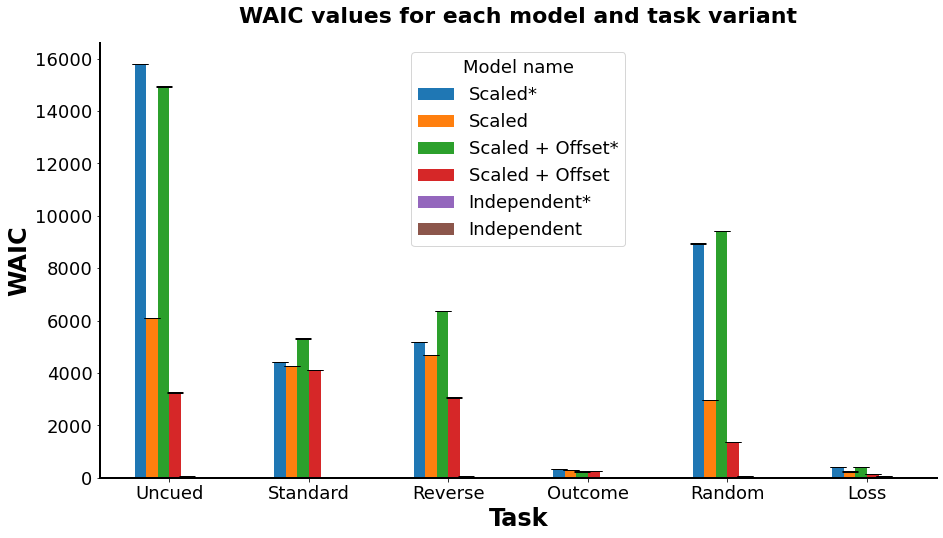

In [18]:
sub_groups = ['Uncued','Standard','Reverse','Outcome','Random','Loss']
x_pos = np.arange(len(sub_groups))

ax = waic_zero.plot.bar(rot = 0, 
                        yerr = waic_df_se.values, 
                        capsize = 8,
                        figsize = (15,8))
plt.rcParams.update({'font.size': 18})
ax.set_xlabel('Task', fontweight = 'bold', fontsize = 24)
ax.set_ylabel('WAIC', fontweight = 'bold', fontsize = 24)
ax.set_xticklabels(sub_groups)
ax.set_title("WAIC values for each model and task variant", 
             fontweight = 'bold',
             fontsize = 22, pad = 20)
ax.set_ylim(bottom = 0)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.legend(["Scaled*","Scaled", "Scaled + Offset*","Scaled + Offset", "Independent*","Independent",], title = "Model name")
#plt.savefig('waic_graphic',facecolor = 'white')

In [ ]:
waic_df_values["minimum"] = waic_df_values.min(axis = 1)

In [ ]:
waic_df_values